In [1]:
# f(x) = -18 * x ** 3 + 5 * x ** 2 + 10 * x - 30
# 1. Определить корни
# 2. Найти интервалы, на которых функция возрастает
# 3. Найти интервалы, на которых функция убывает
# 4. Построить график
# 5. Вычислить вершину
# 6. Определить промежутки, на котором f > 0
# 7. Определить промежутки, на котором f < 0

In [2]:
# Представление функции
from sympy import *
from sympy.plotting import plot

x = Symbol ("x")
f = -18 * x ** 3 + 5 * x ** 2 + 10 * x - 30
# f = 2 * x ** 2 + 5 * x - 30
f

In [4]:
# Находим нули функции
print('Нули функции равны:')
roots = solve(f, x) #решения в формате Python
roots = solveset (f,x, S.Reals) #решения в символьном формате
roots

Нули функции равны:


In [8]:
# Определяем интервалы, где функция возрастает и убывает ('Экстремумы')
extremum_list = [-oo, oo]
extremum_list[1:1] = solve(diff(f), x)
extremum_list

[-oo, 5/54 - sqrt(565)/54, 5/54 + sqrt(565)/54, oo]

In [14]:
# Определяем интревалы возрастания и убывания (по методу семинара)

f_diff = [-oo, oo]
f_diff[1:1] = solve(diff(f), x)

incr_list = []
decr_list = []

for i in range(1, len(f_diff)):
    val = is_increasing(f, Interval.open(f_diff[i - 1], f_diff[i]))
    if val:
        incr_list.append(f"[{f_diff[i - 1]}, {f_diff[i]}]")
    else:
        decr_list.append(f"[{f_diff[i - 1]}, {f_diff[i]}]")

print(f"Убывает на интервалах:", *decr_list, sep="\n")
print(f"Возрастает на интервалах:", *incr_list, sep="\n")

Убывает на интервалах:
[-oo, 5/54 - sqrt(565)/54]
[5/54 + sqrt(565)/54, oo]
Возрастает на интервалах:
[5/54 - sqrt(565)/54, 5/54 + sqrt(565)/54]


In [7]:
# Определяем интревалы возрастания и убывания (немного изменил код, добавил переменные для вычисления интервалов знакопостоянства)
extremum_list = [-oo, oo]
extremum_list[1:1] = solve(diff(f), x)
increas_intervals =[]
decreas_intervals = []
check_inc=0
check_dec=0
for i in range (1,len(extremum_list)):
    temp = is_increasing(f, Interval.open(extremum_list[i-1], extremum_list[i]))
    if temp:
        increas_intervals.append(f'{extremum_list[i-1]},{extremum_list[i]}')
    else:
        decreas_intervals.append(f'{extremum_list[i-1]},{extremum_list[i]}')
if len(increas_intervals)>0:
    print('Функция возрастает на следующих интервалах:')
    for i in range (len(increas_intervals)):
        print (f'({increas_intervals[i]})', end = " ")
        check_inc+=1
    print(f'\n')
else:
    print('Интервалы возрастания отсутствуют')
if len(decreas_intervals)>0:
    print('Функция убываает на следующих интервалах:')
    for i in range (len(decreas_intervals)):
        print (f'({decreas_intervals[i]})', end = " ")
        check_dec+=1
else:
    print('Интервалы убывания отсутствуют')

Функция возрастает на следующих интервалах:
(5/54 - sqrt(565)/54,5/54 + sqrt(565)/54) 

Функция убываает на следующих интервалах:
(-oo,5/54 - sqrt(565)/54) (5/54 + sqrt(565)/54,oo) 

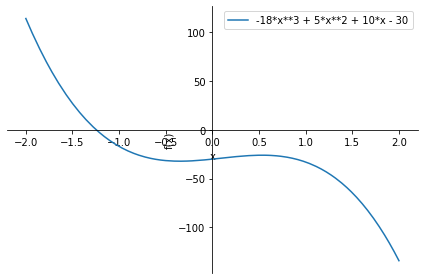

In [10]:
# Строим график
plot(f, (x, -2, 2), legend = True)

In [11]:
# Ищем экстремумы (немного изменил код семинара)
extr = solve(diff(f), x)
count_min = 1
count_max = 1
if len(extr) == 0 or (check_inc==0 or check_dec==0):
    print (f"Максимумы и минимумы отсутствуют!")
elif len(extr) == 1:
    temp_1 = f.subs(x, extr[0]+4)
    temp_2 = f.subs(x, extr[0])
    if temp_2 < temp_1:
        print (f"Минимум {count_min}: x = {extr[0]}, y = {temp_2}")     
    else:
        print (f"Максимум {count_min}: x = {extr[0]}, y = {temp_2}")
else:
    temp_1 = f.subs(x, extr[1])
    for i in extr:
        temp_2 = f.subs(x, i)
        if temp_2 < temp_1:
            print (f"Минимум {count_min}: x = {i}, y = {temp_2}")
            count_min+=1
            temp_1 = temp_2
        elif temp_2 > temp_1:
            print (f"Максимум {count_max}: x = {i}, y = {temp_2}")
            count_max+=1
            temp_1 = temp_2

Минимум 1: x = 5/54 - sqrt(565)/54, y = -785/27 - 18*(5/54 + sqrt(565)/54)**3 + 5*(5/54 + sqrt(565)/54)**2 + 5*sqrt(565)/27
Максимум 1: x = 5/54 + sqrt(565)/54, y = -785/27 - 5*sqrt(565)/27 + 5*(5/54 - sqrt(565)/54)**2 - 18*(5/54 - sqrt(565)/54)**3


In [12]:
# Нахождение интервалов знакопостоянства по методу семинара (некорректная работа)

roots_fun = [-oo, oo]
roots_fun[1:1] = (solve(f, x))

incr_list = []
decr_list = []

for i in range(1, len(roots_fun)):
    num_1, num_2 = roots_fun[i - 1], roots_fun[i]
    val = is_increasing(f, Interval.open(num_1, num_2))
    if val:
        decr_list.append(f"[{num_1}, {num_2}]")
    else:
        incr_list.append(f"[{num_1}, {num_2}]")

print("f > 0:", *incr_list, sep="\n")
print("f < 0:", *decr_list, sep="\n")

f > 0:
[-oo, 5/54 - 565/(972*(-1/2 - sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3]
[5/54 - 565/(972*(-1/2 - sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3, 5/54 - (-1/2 + sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3 - 565/(972*(-1/2 + sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3))]
[5/54 - (-1/2 + sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3 - 565/(972*(-1/2 + sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)), -(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3 - 565/(972*(5*sqrt(218931)/108 + 127045/5832)**(1/3)) + 5/54]
[-(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3 - 565/(972*(5*sqrt(218931)/108 + 127045/5832)**(1/3)) + 5/54, oo]
f < 0:


In [13]:
# Ищем интервал знакопостоянства функции (тоже не работает)
root_f = [-oo, oo]
root_f[1:1] = (solve(f, x))
print (root_f)
pos_list = []
neg_list = []

for i in range(1, len(root_f)):
    if root_f[i-1] == -oo:
        num_1 = root_f[i]-1
        num_2 = root_f[i]
    elif root_f[i] == oo:
        num_1 = root_f[i-1]
        num_2 = root_f[i-1]+1
    else:
        num_1 = root_f[i-1]
        num_2 = root_f[i]
    sred = (num_1+num_2)/2
    ask_pos = f.subs(x,sred)
    num_1 = root_f[i-1]
    num_2 = root_f[i]
    if ask(Q.positive(ask_pos)):
        pos_list.append(f"[{num_1}, {num_2}]")
    else:
        neg_list.append(f"[{num_1}, {num_2}]")

print('Функция больше 0:', *pos_list, sep ='\n')
print('Функция меньше 0:', *neg_list, sep ='\n')

[-oo, 5/54 - 565/(972*(-1/2 - sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3, 5/54 - (-1/2 + sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3 - 565/(972*(-1/2 + sqrt(3)*I/2)*(5*sqrt(218931)/108 + 127045/5832)**(1/3)), -(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3 - 565/(972*(5*sqrt(218931)/108 + 127045/5832)**(1/3)) + 5/54, oo]


AttributeError: AttributeError: 'Add' object has no attribute '_prec'